In [3]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import emcee

In [4]:
def init_board(L):
    return npr.choice([-1,1],size=(L,L))

In [21]:
def sum_neighbor(board,i,j):
    dirs = [(1,0), (-1,0), (0,1), (0,-1)]
    res = 0
    for x,y in dirs:
        ix, iy = (i+x)%L, (i+y)%L
        res += board[ix, iy]
    return res

In [35]:
def gibb_gen(board, i, j, beta,k=None,N=None):
    nb_sum = sum_neighbor(board,i,j)
    a = np.exp(beta*nb_sum)
    b = np.exp(-beta*nb_sum)
    wp = a/(a+b)
    sigma = (np.random.rand() < wp) * 2 - 1
    return sigma

In [36]:
def met_gen(board, i, j, beta,k=None, N=None):
    res = -board[i][j]
    nsum = sum_neighbor(board, i, j)
    ratio = np.exp(-4*beta*board[i,j]*nsum)
    return res * (ratio > np.random.rand())

In [37]:
def jarz_gen(board, i, j, beta,k,N):
    nb_sum = sum_neighbor(board,i,j)
    a = np.exp(beta*nb_sum*k/N)
    b = np.exp(-beta*nb_sum*k/N)
    wp = a/(a+b)
    sigma = (np.random.rand() < wp) * 2 - 1
    return sigma

In [50]:
def plot_mag(mag, gen):
    plt.hist(mag,bins=20,label=gen)
    plt.title("Histogram of magnetization")
    plt.xlabel("Magnetization")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

In [60]:
gen_dict = {"gibb":gibb_gen, "met":met_gen, "jarz":jarz_gen}

def sampling(beta, L, itermax, generater):
    gen = gen_dict[generater]
    board = init_board(L)
    magnet = np.zeros(itermax)
    for _ in range(itermax):
        i,j = npr.randint(L, size=2)
        board[i,j] = gen(board,i,j,beta,_,itermax)
        magnet[_] = board.sum() / L**2
    plot_mag(magnet, generater)
    iac = emcee.autocorr.integrated_time(magnet)
    print(f"integrated autocorrelation time {iac[0]:.4f}")
    return iac

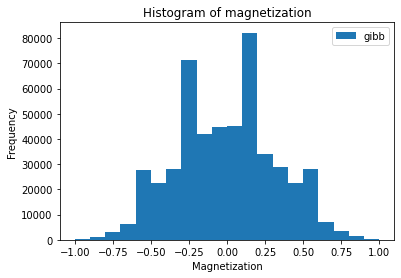

integrated autocorrelation time 141.4574


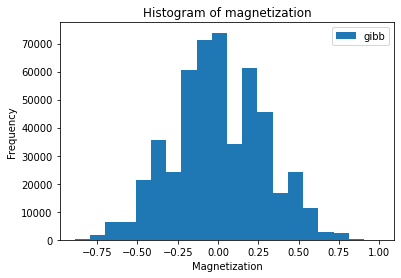

integrated autocorrelation time 180.3990


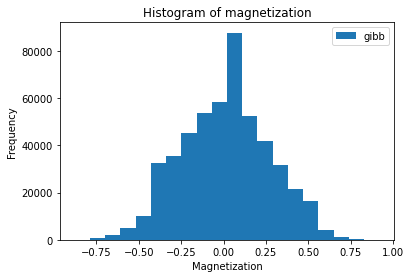

integrated autocorrelation time 283.6816


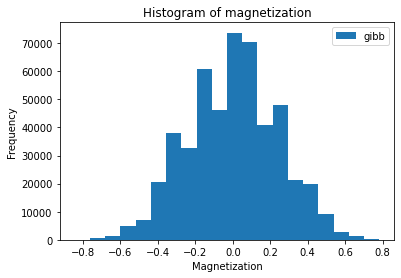

integrated autocorrelation time 329.1845


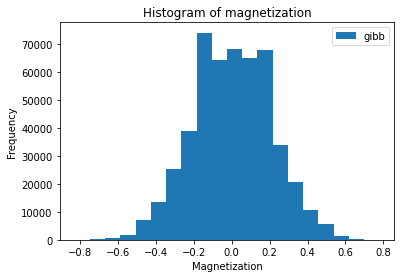

integrated autocorrelation time 489.2284


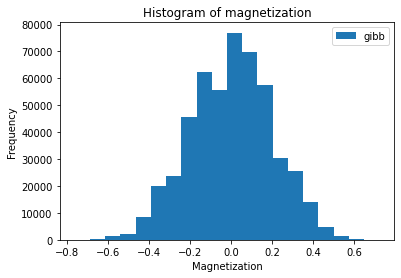

integrated autocorrelation time 656.3918


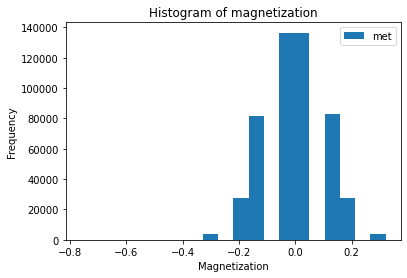

integrated autocorrelation time 24.4407


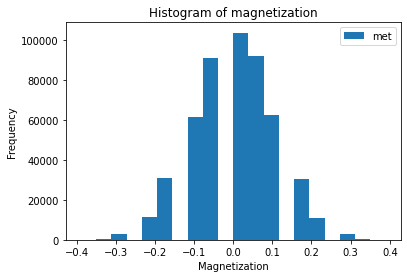

integrated autocorrelation time 34.7198


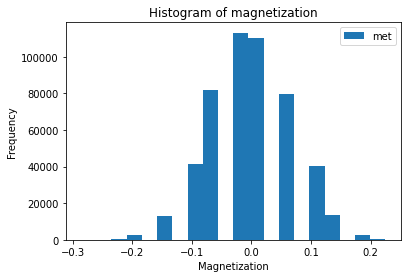

integrated autocorrelation time 46.1055


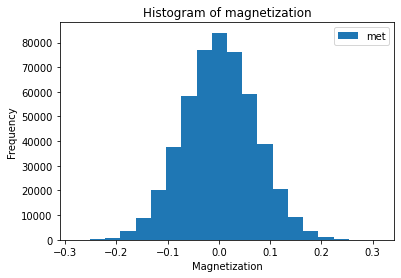

integrated autocorrelation time 68.8367


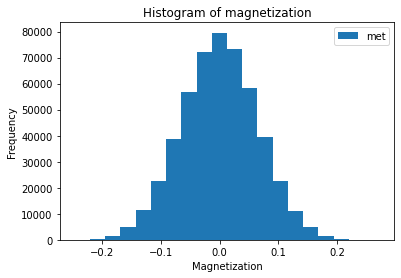

integrated autocorrelation time 77.7841


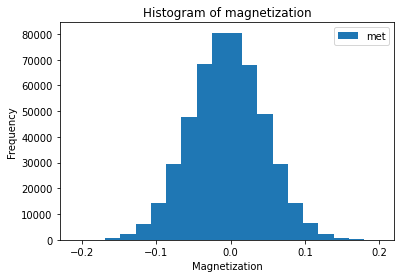

integrated autocorrelation time 104.0388


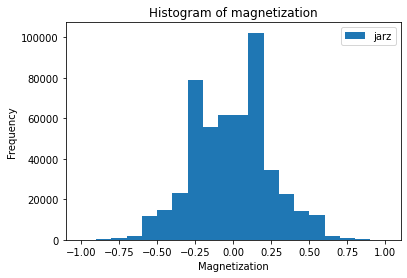

integrated autocorrelation time 82.9754


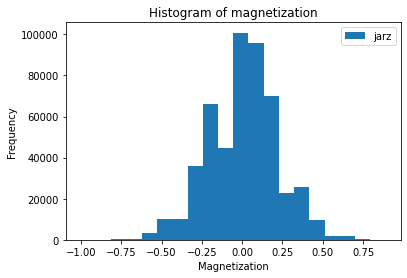

integrated autocorrelation time 142.3922


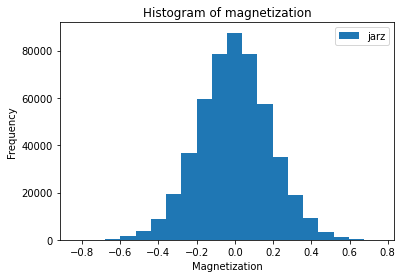

integrated autocorrelation time 183.1462


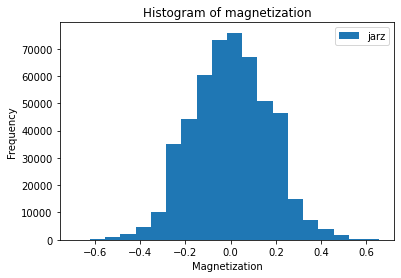

integrated autocorrelation time 257.0810


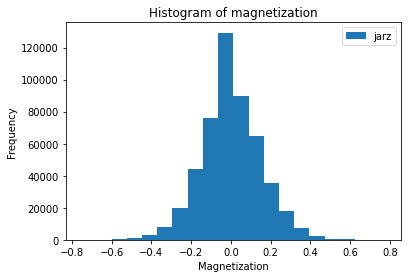

integrated autocorrelation time 300.6933


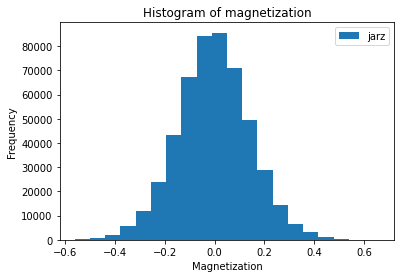

integrated autocorrelation time 375.1218
[141.4574 180.399  283.6816 329.1845 489.2284 656.3918  24.4407  34.7198
  46.1055  68.8367  77.7841 104.0388  82.9754 142.3922 183.1462 257.081
 300.6933 375.1218]


In [83]:
_L = [5,6,7,8,9,10]
T = 6.0
itermax = 500000
beta = 1/T
results = []
for g in gen_dict:
    for L in _L:
        res = sampling(beta, L, itermax, g)
        results.append(res[0])
results = np.round(results, decimals=4)
print(results)

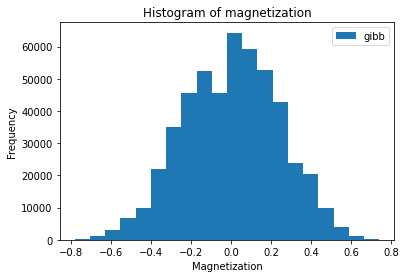

integrated autocorrelation time 678.1930


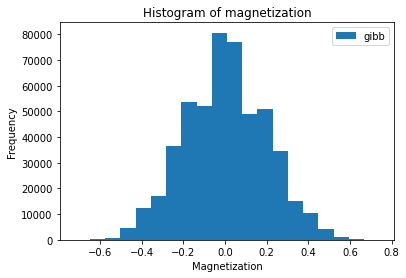

integrated autocorrelation time 734.2595


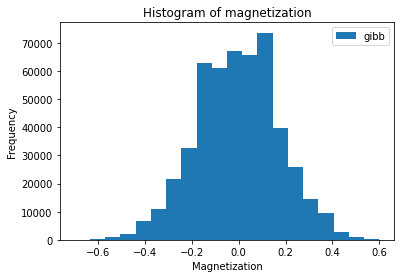

integrated autocorrelation time 576.6587


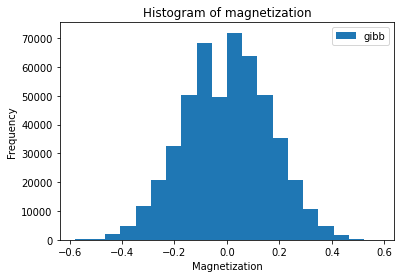

integrated autocorrelation time 341.6740


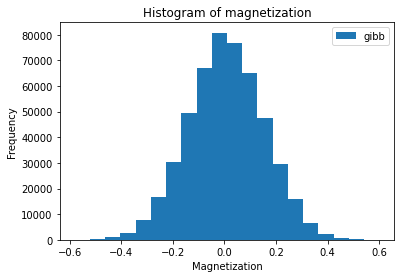

integrated autocorrelation time 437.7528


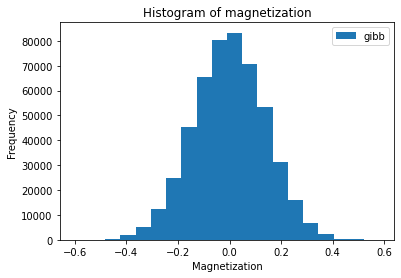

integrated autocorrelation time 313.5052


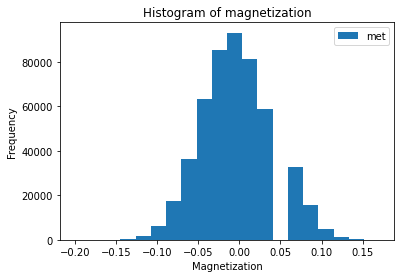

integrated autocorrelation time 100.4333


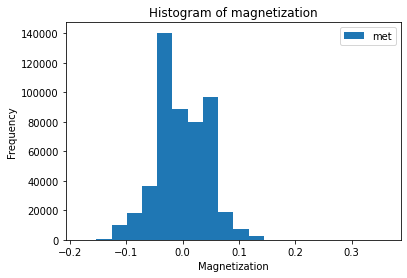

integrated autocorrelation time 104.7316


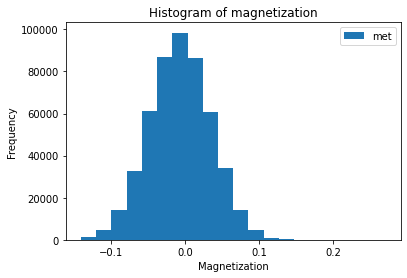

integrated autocorrelation time 92.6742


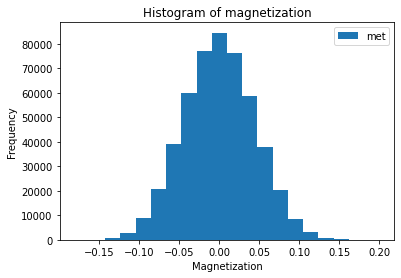

integrated autocorrelation time 100.9314


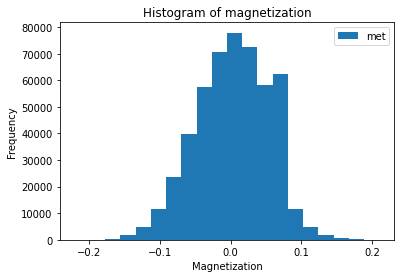

integrated autocorrelation time 96.7298


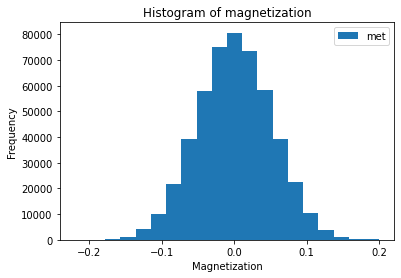

integrated autocorrelation time 102.1576


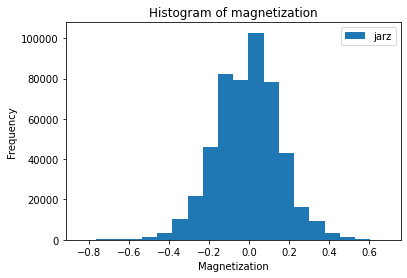

integrated autocorrelation time 641.9155


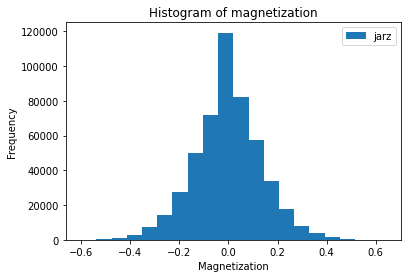

integrated autocorrelation time 433.5088


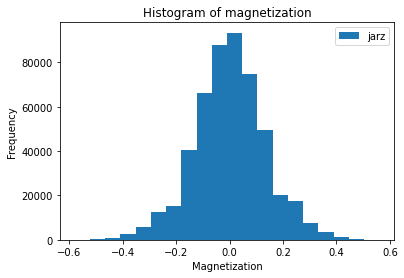

integrated autocorrelation time 493.7886


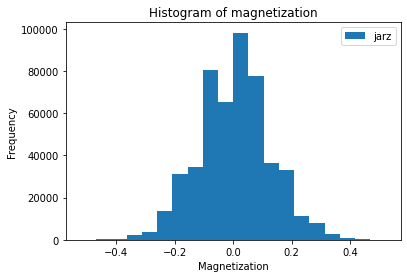

integrated autocorrelation time 279.7680


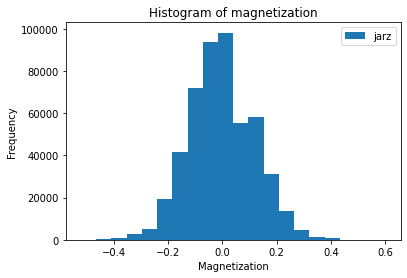

integrated autocorrelation time 295.1638


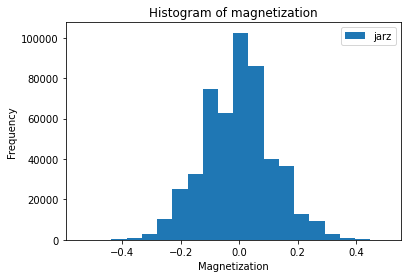

integrated autocorrelation time 268.7413
[678.193  734.2595 576.6587 341.674  437.7528 313.5052 100.4333 104.7316
  92.6742 100.9314  96.7298 102.1576 641.9155 433.5088 493.7886 279.768
 295.1638 268.7413]


In [82]:
L = 10
_T = np.array([5,6,7,8,9,10])
itermax = 500000
_beta = 1/_T
results2 = []
for g in gen_dict:
    for beta in _beta:
        res = sampling(beta, L, itermax, g)
        results2.append(res[0])
results2 = np.round(results2, decimals=4)
print(results2)

In [91]:
def get_str(res):
    formatter = 'iat & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\'
    print(formatter.format(*res[:6]))
    print(formatter.format(*res[6:12]))
    print(formatter.format(*res[12:]))

In [92]:
get_str(results)

iat & 141.46 & 180.40 & 283.68 & 329.18 & 489.23 & 656.39 \\
iat & 24.44 & 34.72 & 46.11 & 68.84 & 77.78 & 104.04 \\
iat & 82.98 & 142.39 & 183.15 & 257.08 & 300.69 & 375.12 \\


In [93]:
get_str(results2)

iat & 678.19 & 734.26 & 576.66 & 341.67 & 437.75 & 313.51 \\
iat & 100.43 & 104.73 & 92.67 & 100.93 & 96.73 & 102.16 \\
iat & 641.92 & 433.51 & 493.79 & 279.77 & 295.16 & 268.74 \\
